# process all turtle XML files

In [1]:
import pandas as pd
import glob
import os
from bs4 import BeautifulSoup as b
from pyproj import Proj 
import numpy as np
import matplotlib.pyplot as plt
import cv2 

# Step 1 load xif data from jason file

![title]("img/picture.png")

In [2]:
surveys = pd.read_json("/OSM/PER/OA_NINGALOO_TAGGING/work/drone/surveys/images.json")

In [3]:
surveys.GPSLongitude.head(5).str.split(' ',expand=True)


def get_longitude(item):
    longitude =float(item[0]) + float(item[2][0:-1])/60 + float(item[3][0:-1])/3600
    return (longitude)
surveys['longitude'] = pd.np.NAN
surveys['latitude'] = pd.np.NAN
surveys.loc[ ~surveys['GPSLongitude'].isna(),'longitude']=surveys.loc[ ~surveys['GPSLongitude'].isna(),'GPSLongitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)
surveys.loc[ ~surveys['GPSLatitude'].isna(),'latitude']=surveys.loc[ ~surveys['GPSLatitude'].isna(),'GPSLatitude'].str.split(' ',expand=True).apply(get_longitude,axis=1)*-1
surveys =surveys[~surveys.longitude.isna()]

In [4]:
myProj = Proj("+proj=utm +zone=49K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
surveys['easting'], surveys['northing'] = myProj(surveys['longitude'].values, surveys['latitude'].values)

In [5]:
%matplotlib notebook
# neds only 
#mask = (surveys.latitude>-21.964) & (surveys.latitude<-21.954)
#surveys = pd.DataFrame(surveys.loc[mask])
surveys['BaseName']=surveys.SourceFile.apply(os.path.basename)
surveys['BaseName']=surveys['BaseName'].str[0:-4]
surveys['area']=surveys['BaseName'].str.split('_',expand=True)[0]

In [6]:
surveys.BaseName.str.contains('ned').max()

True

In [17]:
files = glob.glob(r'/OSM/PER/OA_NINGALOO_TAGGING/work/drone/surveys/**/*.xml',recursive=True)
len(files)

437

In [18]:
turtles =pd.DataFrame(files,columns=['path'])
turtles['BaseName']=turtles.path.apply(os.path.basename)
turtles['BaseName']=turtles['BaseName'].str[0:-4]
turtles =turtles.merge(surveys,on=['BaseName'])
turtles

,path,BaseName,About,AbsoluteAltitude,AlreadyApplied,Aperture,ApertureValue,BitsPerSample,CalibratedFocalLength,CalibratedOpticalCenterX,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,area
0,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090420_2036,DJI Meta Data,90.61,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.4,113.929344,-22.000347,802464.111104,7.564236e+06,neds
1,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090016_1943,DJI Meta Data,90.51,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.3,113.929728,-21.999203,802506.147331,7.564362e+06,neds
2,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090435_2042,DJI Meta Data,90.61,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929661,-21.999936,802497.701799,7.564281e+06,neds
3,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T085951_1933,DJI Meta Data,90.51,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929139,-21.999967,802443.681612,7.564279e+06,neds
4,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090051_1957,DJI Meta Data,90.61,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.3,113.930497,-21.998197,802587.782055,7.564472e+06,neds
5,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090721_2106,DJI Meta Data,90.61,False,5.6,5.6,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,-145.0,113.929506,-22.000467,802480.503146,7.564223e+06,neds
6,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090021_1945,DJI Meta Data,90.51,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929839,-21.999056,802517.939954,7.564378e+06,neds
7,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090049_1956,DJI Meta Data,90.61,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.930450,-21.998256,802582.779130,7.564466e+06,neds
8,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090024_1946,DJI Meta Data,90.51,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929883,-21.998994,802522.661730,7.564385e+06,neds
9,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,neds_20180120T090044_1954,DJI Meta Data,90.61,False,5.0,5.0,8,3666.666504,2432.0,...,72,Centered,YCbCr4:2:2 (2 1),72,35.3,113.930336,-21.998408,802570.687582,7.564449e+06,neds


<IPython.core.display.Javascript object>


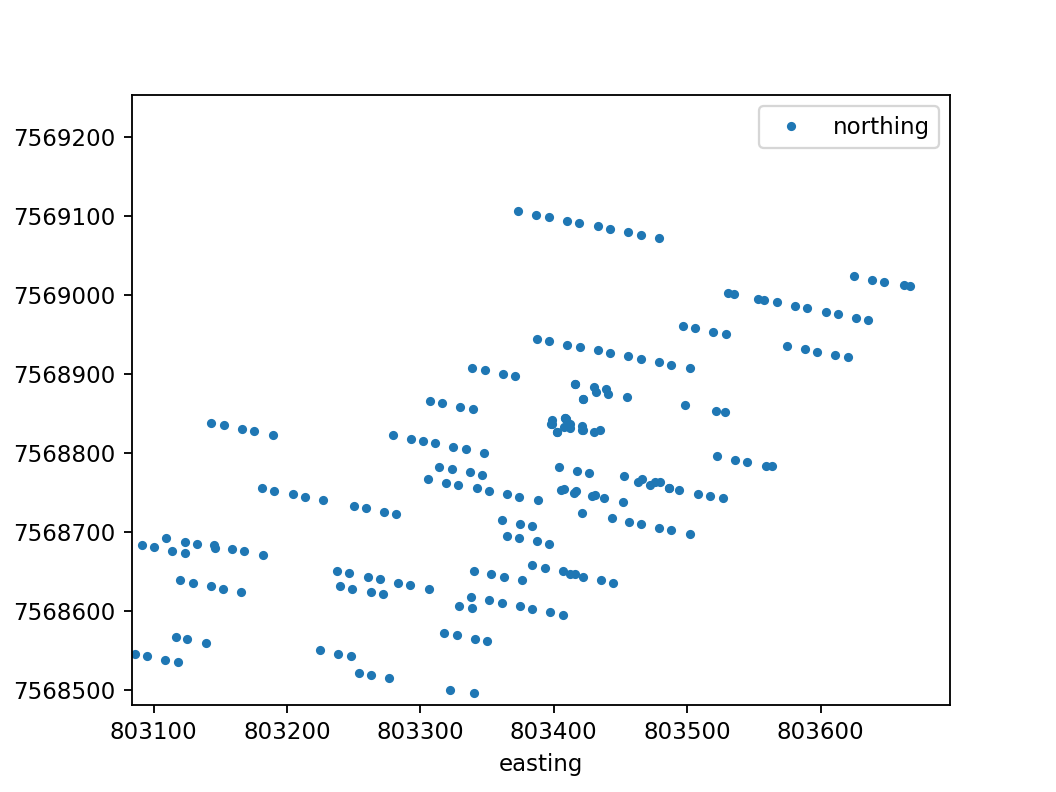

In [19]:
turtles.plot(x='easting',y='northing',marker ='.',linestyle='')

In [30]:

def get_turtle_xy(path):
    #print(path)
    with open(path, "r") as f: # opening xml file
        content = f.read()
    soup = b(content, "lxml")
    xmin = [];
    xmax =[];
    ymin = [];
    ymax =[];
    x=[];
    y=[];
    opath =[]
    objtype = []
    for obj in soup.findAll("object"):
        objtype.append(obj.find('name').text)
        opath.append(path) 
        x.append((int(obj.find('xmin').text) +int(obj.find('xmax').text))/2)
        y.append((int(obj.find('ymin').text) +int(obj.find('ymax').text))/2)
        xmin.append(int(obj.find('xmin').text))
        xmax.append(int(obj.find('xmax').text))
        ymin.append(int(obj.find('ymin').text))
        ymax.append(int(obj.find('ymax').text))
    return pd.DataFrame({'path':opath,'x':x,'xmin':xmin,'xmax':xmax,'y':y,'ymin':ymin,'ymax':ymax,'type':objtype})
output =list(turtles.path.apply(get_turtle_xy))
output =pd.concat(output)
output['BaseName']=output.path.apply(os.path.basename)
output['BaseName']=output['BaseName'].str[0:-4]

In [31]:
output =output.merge(turtles,on=['BaseName'])
output

,path_x,x,xmin,xmax,y,ymin,ymax,type,BaseName,path_y,...,XResolution,YCbCrPositioning,YCbCrSubSampling,YResolution,Yaw,longitude,latitude,easting,northing,area
0,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,2587.0,2510,2664,2858.5,2793,2924,turtles,neds_20180120T090420_2036,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.4,113.929344,-22.000347,802464.111104,7.564236e+06,neds
1,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,1722.0,1647,1797,793.0,745,841,turtles,neds_20180120T090016_1943,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.3,113.929728,-21.999203,802506.147331,7.564362e+06,neds
2,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,1935.5,1891,1980,1387.0,1337,1437,diving turtle,neds_20180120T090435_2042,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929661,-21.999936,802497.701799,7.564281e+06,neds
3,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,3143.0,3104,3182,1606.0,1578,1634,diivng turtle,neds_20180120T085951_1933,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929139,-21.999967,802443.681612,7.564279e+06,neds
4,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,3677.0,3600,3754,3410.0,3352,3468,diving turtle,neds_20180120T090051_1957,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.3,113.930497,-21.998197,802587.782055,7.564472e+06,neds
5,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,4119.0,4066,4172,1595.0,1556,1634,diivng turtle,neds_20180120T090721_2106,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,-145.0,113.929506,-22.000467,802480.503146,7.564223e+06,neds
6,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,1575.5,1504,1647,2548.5,2495,2602,diving turtle,neds_20180120T090021_1945,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929839,-21.999056,802517.939954,7.564378e+06,neds
7,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,3637.0,3593,3681,2492.5,2433,2552,diving turtle,neds_20180120T090049_1956,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.930450,-21.998256,802582.779130,7.564466e+06,neds
8,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,1483.0,1416,1550,3388.5,3325,3452,diving turtle,neds_20180120T090024_1946,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.2,113.929883,-21.998994,802522.661730,7.564385e+06,neds
9,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,3584.0,3553,3615,706.0,666,746,diving turtle,neds_20180120T090044_1954,/OSM/PER/OA_NINGALOO_TAGGING/work/drone/survey...,...,72,Centered,YCbCr4:2:2 (2 1),72,35.3,113.930336,-21.998408,802570.687582,7.564449e+06,neds


In [32]:
output['rads']=np.deg2rad(output.FlightYawDegree)

In [33]:
output['dx']=((2432-output.x)/3666.666504)*output.RelativeAltitude
output['dy']=((1824-output.y)/3666.666504)*output.RelativeAltitude


In [34]:
    output['xx'] = output['dx'] * np.cos(output['rads']) +  output['dy'] * np.sin(output['rads'])
    output['xx'] =  output['easting'] + output['xx'] 
    output['yy'] = -output['dx'] * np.sin(output['rads']) + output['dy'] * np.cos(output['rads'])
    output['yy'] = output['northing'] + output['yy'] 

<IPython.core.display.Javascript object>


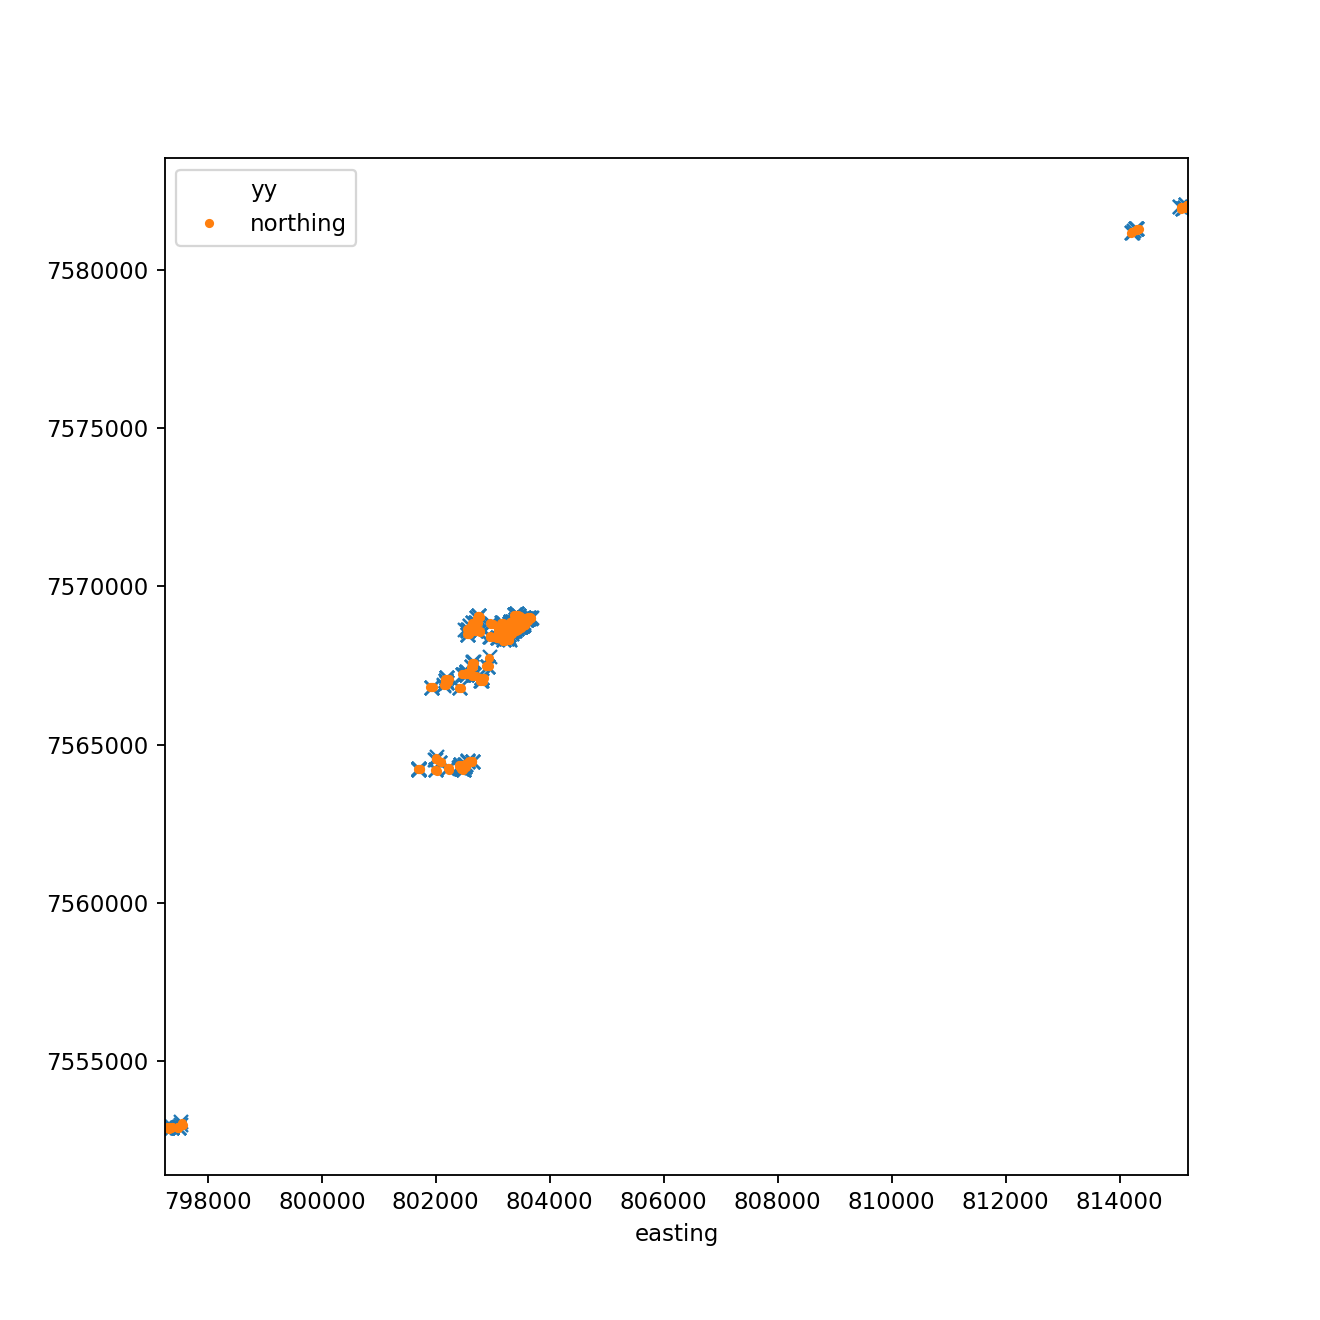

In [35]:
fig, ax = plt.subplots(figsize=(8,8))
output.plot(x='xx',y='yy',marker ='x',linestyle='',ax=ax)
turtles.plot(x='easting',y='northing',marker ='.',linestyle='',ax=ax)

In [63]:
output['tutleno'] =1
output['tutleno'] = output.groupby(['path_x'])['tutleno'].cumsum()

In [37]:
output.to_csv('source.csv',index=False)

In [2]:
output =pd.read_csv('source.csv')

In [95]:
def crop_image(item):
    img =cv2.imread(os.path.splitext(item.path_y)[0]+'.jpg')
    base = os.path.splitext(os.path.basename(item.path_y))[0]
    width = item.xmax- item.xmin
    height = item.ymax-item.ymin
    dx = 1024-width
    dy = 1024-height
    xrand = np.random.random()
    yrand = np.random.random()
    xmin = int(item.xmin -xrand*dx)
    xmax = int(item.xmax +(1-xrand)*dx)
    ymin = int(item.ymin -yrand*dy)
    ymax = int(item.ymax +(1-yrand)*dy)
    #label_idx x_center y_center width height
    box = {'0_class':0,'1_x_center':(xrand*dx+((item.xmax-item.xmin)/2))/1024,
           '2_y_center':(yrand*dy+((item.ymax-item.ymin)/2))/1024,
            '3_width' :((item.xmax-item.xmin)/2)/1024,
            '4_height' :((item.ymax-item.ymin)/2)/1024} 
    img = img[ymin:ymax,xmin:xmax]
    if img.size>0:
        cv2.imwrite(f'{base}_{item.tutleno:02d}.jpg', img,[int(cv2.IMWRITE_JPEG_QUALITY), 90])
        b =pd.DataFrame([box])
        b.to_csv(f'{base}_{item.tutleno:02d}.txt',index=False,sep=' ',header=None)

In [98]:
output.apply(crop_image,axis=1)

0      None
1      None
2      None
3      None
4      None
5      None
6      None
7      None
8      None
9      None
10     None
11     None
12     None
13     None
14     None
15     None
16     None
17     None
18     None
19     None
20     None
21     None
22     None
23     None
24     None
25     None
26     None
27     None
28     None
29     None
       ... 
474    None
475    None
476    None
477    None
478    None
479    None
480    None
481    None
482    None
483    None
484    None
485    None
486    None
487    None
488    None
489    None
490    None
491    None
492    None
493    None
494    None
495    None
496    None
497    None
498    None
499    None
500    None
501    None
502    None
503    None
Length: 504, dtype: object

In [9]:
os.path.splitext(output.iloc[0].path_y)[0]+'.jpg'

'/OSM/PER/OA_NINGALOO_TAGGING/work/drone/surveys/survey_09/neds_20180120T090420_2036.jpg'

In [50]:
xmin

2468

In [52]:
xmin+(item.xmax-item.xmin)/2

2545.0

In [55]:
xrand*dx+(item.xmax-item.xmin)/2

118.9435588664258